In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [68]:
df=pd.read_csv("https://vbfilestorage.blob.core.windows.net/datasets/Telco-Customer-Churn.csv")
df_original = df.copy()

In [69]:
df_original['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [70]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Convert 'Yes'/'No' to 1/0 for the binary columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# Encode categorical features using LabelEncoder
cat_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Handling missing TotalCharges by converting it to a float and filling missing values with the median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [71]:
newdf['StreamingTVOrig']=df_original['StreamingTV']
newdf['StreamingTVEncoded']=df['StreamingTV']
newdf['StreamingMoviesOrig']=df_original['StreamingMovies']
newdf['StreamingMoviesEncoded']=df['StreamingMovies']
newdf['PhoneServiceOrig']=df_original['PhoneService']
newdf['PhoneServiceEncoded']=df['PhoneService']
newdf['DeviceProtectionOrig']=df_original['DeviceProtection']
newdf['DeviceProtectionEncoded']=df['DeviceProtection']
newdf['OnlineBackupOrig']=df_original['OnlineBackup']
newdf['OnlineBackupEncoded']=df['OnlineBackup']
newdf['OnlineSecurityOrig']=df_original['OnlineSecurity']
newdf['OnlineSecurityEncoded']=df['OnlineSecurity']
newdf['PaymentMethodOrig']=df_original['PaymentMethod']
newdf['PaymentMethodEncoded']=df['PaymentMethod']
newdf['ContractOrig']=df_original['Contract']
newdf['ContractEncoded']=df['Contract']

In [72]:
newdf.groupby(['ContractOrig','ContractEncoded']).size()

,,0
ContractOrig,ContractEncoded,
Month-to-month,0,3875
One year,1,1473
Two year,2,1695


In [73]:
from sklearn.preprocessing import OneHotEncoder

oheencoder=OneHotEncoder()

encoded = oheencoder.fit_transform(df_original[['PaymentMethod']]).toarray()

encoder_df = pd.DataFrame(encoded,columns=oheencoder.get_feature_names_out())

In [60]:
encoder_df

,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
7038,0.0,0.0,0.0,1.0
7039,0.0,1.0,0.0,0.0
7040,0.0,0.0,1.0,0.0
7041,0.0,0.0,0.0,1.0


In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Dropping customerID since it has no predictive value
df = df.drop(columns=['customerID'])

<ipython-input-75-f3ca93cdc477>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'After Standardization')

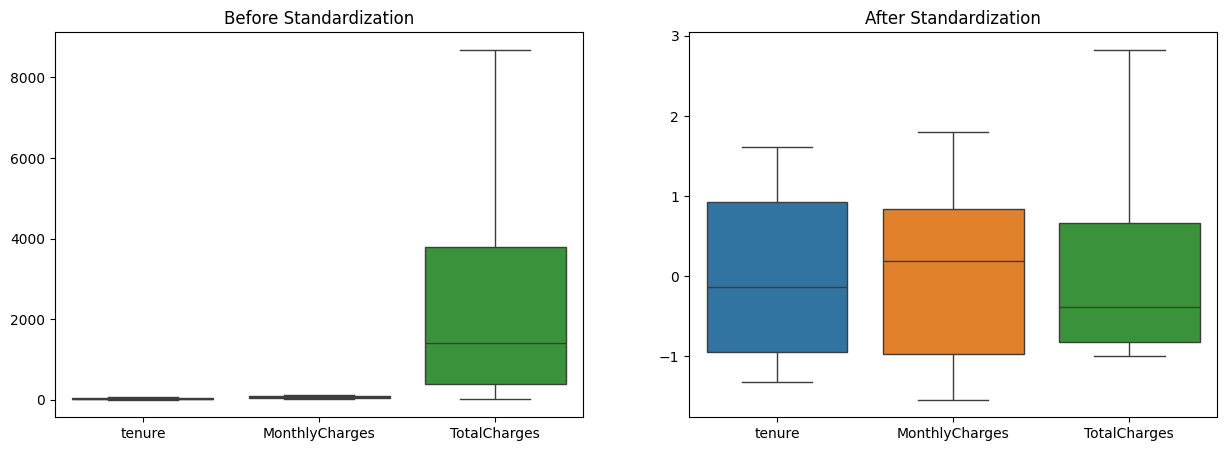

In [75]:
#plot effects of standardization
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(df_original[['tenure','MonthlyCharges','TotalCharges']])
plt.title('Before Standardization')
plt.subplot(1,2,2)
sns.boxplot(df[['tenure','MonthlyCharges','TotalCharges']])
plt.title('After Standardization')
